
<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
  1.Importing required libraries:</p><br>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import re
import seaborn as sns
from scipy.io import arff
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

## display all the columns of a dataframe 
pd.pandas.set_option('display.max_columns',None)

In [63]:
import pandas as pd

# Your column names
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'xAttack','difficulty_level'
]
data_test = pd.read_csv('KDDTest+.txt', header=None, names=column_names)
data_train = pd.read_csv('KDDTrain+.txt', header=None, names=column_names)
data_test = data_test.drop('xAttack', axis=1)
data_train = data_train.drop('xAttack', axis=1)


we removed the target which is XAttack from both datasets 

## data train

In [64]:
data_train.head(7)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21


In [4]:
data_test.head(7)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
5,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,21


In [65]:
print(f'\033[94mNumber of records (rows) in the train_data are: {data_train.shape[0]}')
print(f'\033[94mNumber of features (columns) in train_data are: {data_train.shape[1]}')
print(f'\033[94mNumber of duplicate entries in train_data are: {data_train.duplicated().sum()}')
print(f'\033[94mNumber missing values in the train_data are: {sum(data_train.isna().sum())}')

Number of records (rows) in the train_data are: 125973
Number of features (columns) in train_data are: 42
Number of duplicate entries in train_data are: 9
Number missing values in the train_data are: 0


We have 9 duplicates so we have to remove them lately in the data preparation

In [6]:
data_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

## data test

In [8]:
data_test.head(7)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
5,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,21


In [9]:
data_test.tail(7)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
22537,1,tcp,smtp,SF,2599,293,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.0,0.00,255,186,0.73,0.13,0.00,0.00,0.00,0.0,0.26,0.00,11
22538,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,53,0.0,0.0,0.0,0.0,1.00,0.0,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00,20
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.0,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,21
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.0,0.0,0.0,1.00,0.0,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.0,0.0,0.0,1.00,0.0,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.0,0.0,0.0,1.00,0.0,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,21
22543,0,tcp,sunrpc,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,10,0.0,0.0,1.0,1.0,0.25,1.0,1.00,255,21,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,14


In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

### Visualization of the Data :

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 4. Exploratory data analysis :
</p><br>


### A) Relationships :

### Correlation Matrix HeatMap

In [11]:
def correlation_matrix_heatMap (data_set):
    correlation_matrix = data_set.corr()

    plt.figure(figsize=(30, 30))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()
   

C:\Users\Brinsi\AppData\Local\Temp\ipykernel_4768\2660022262.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_set.corr()


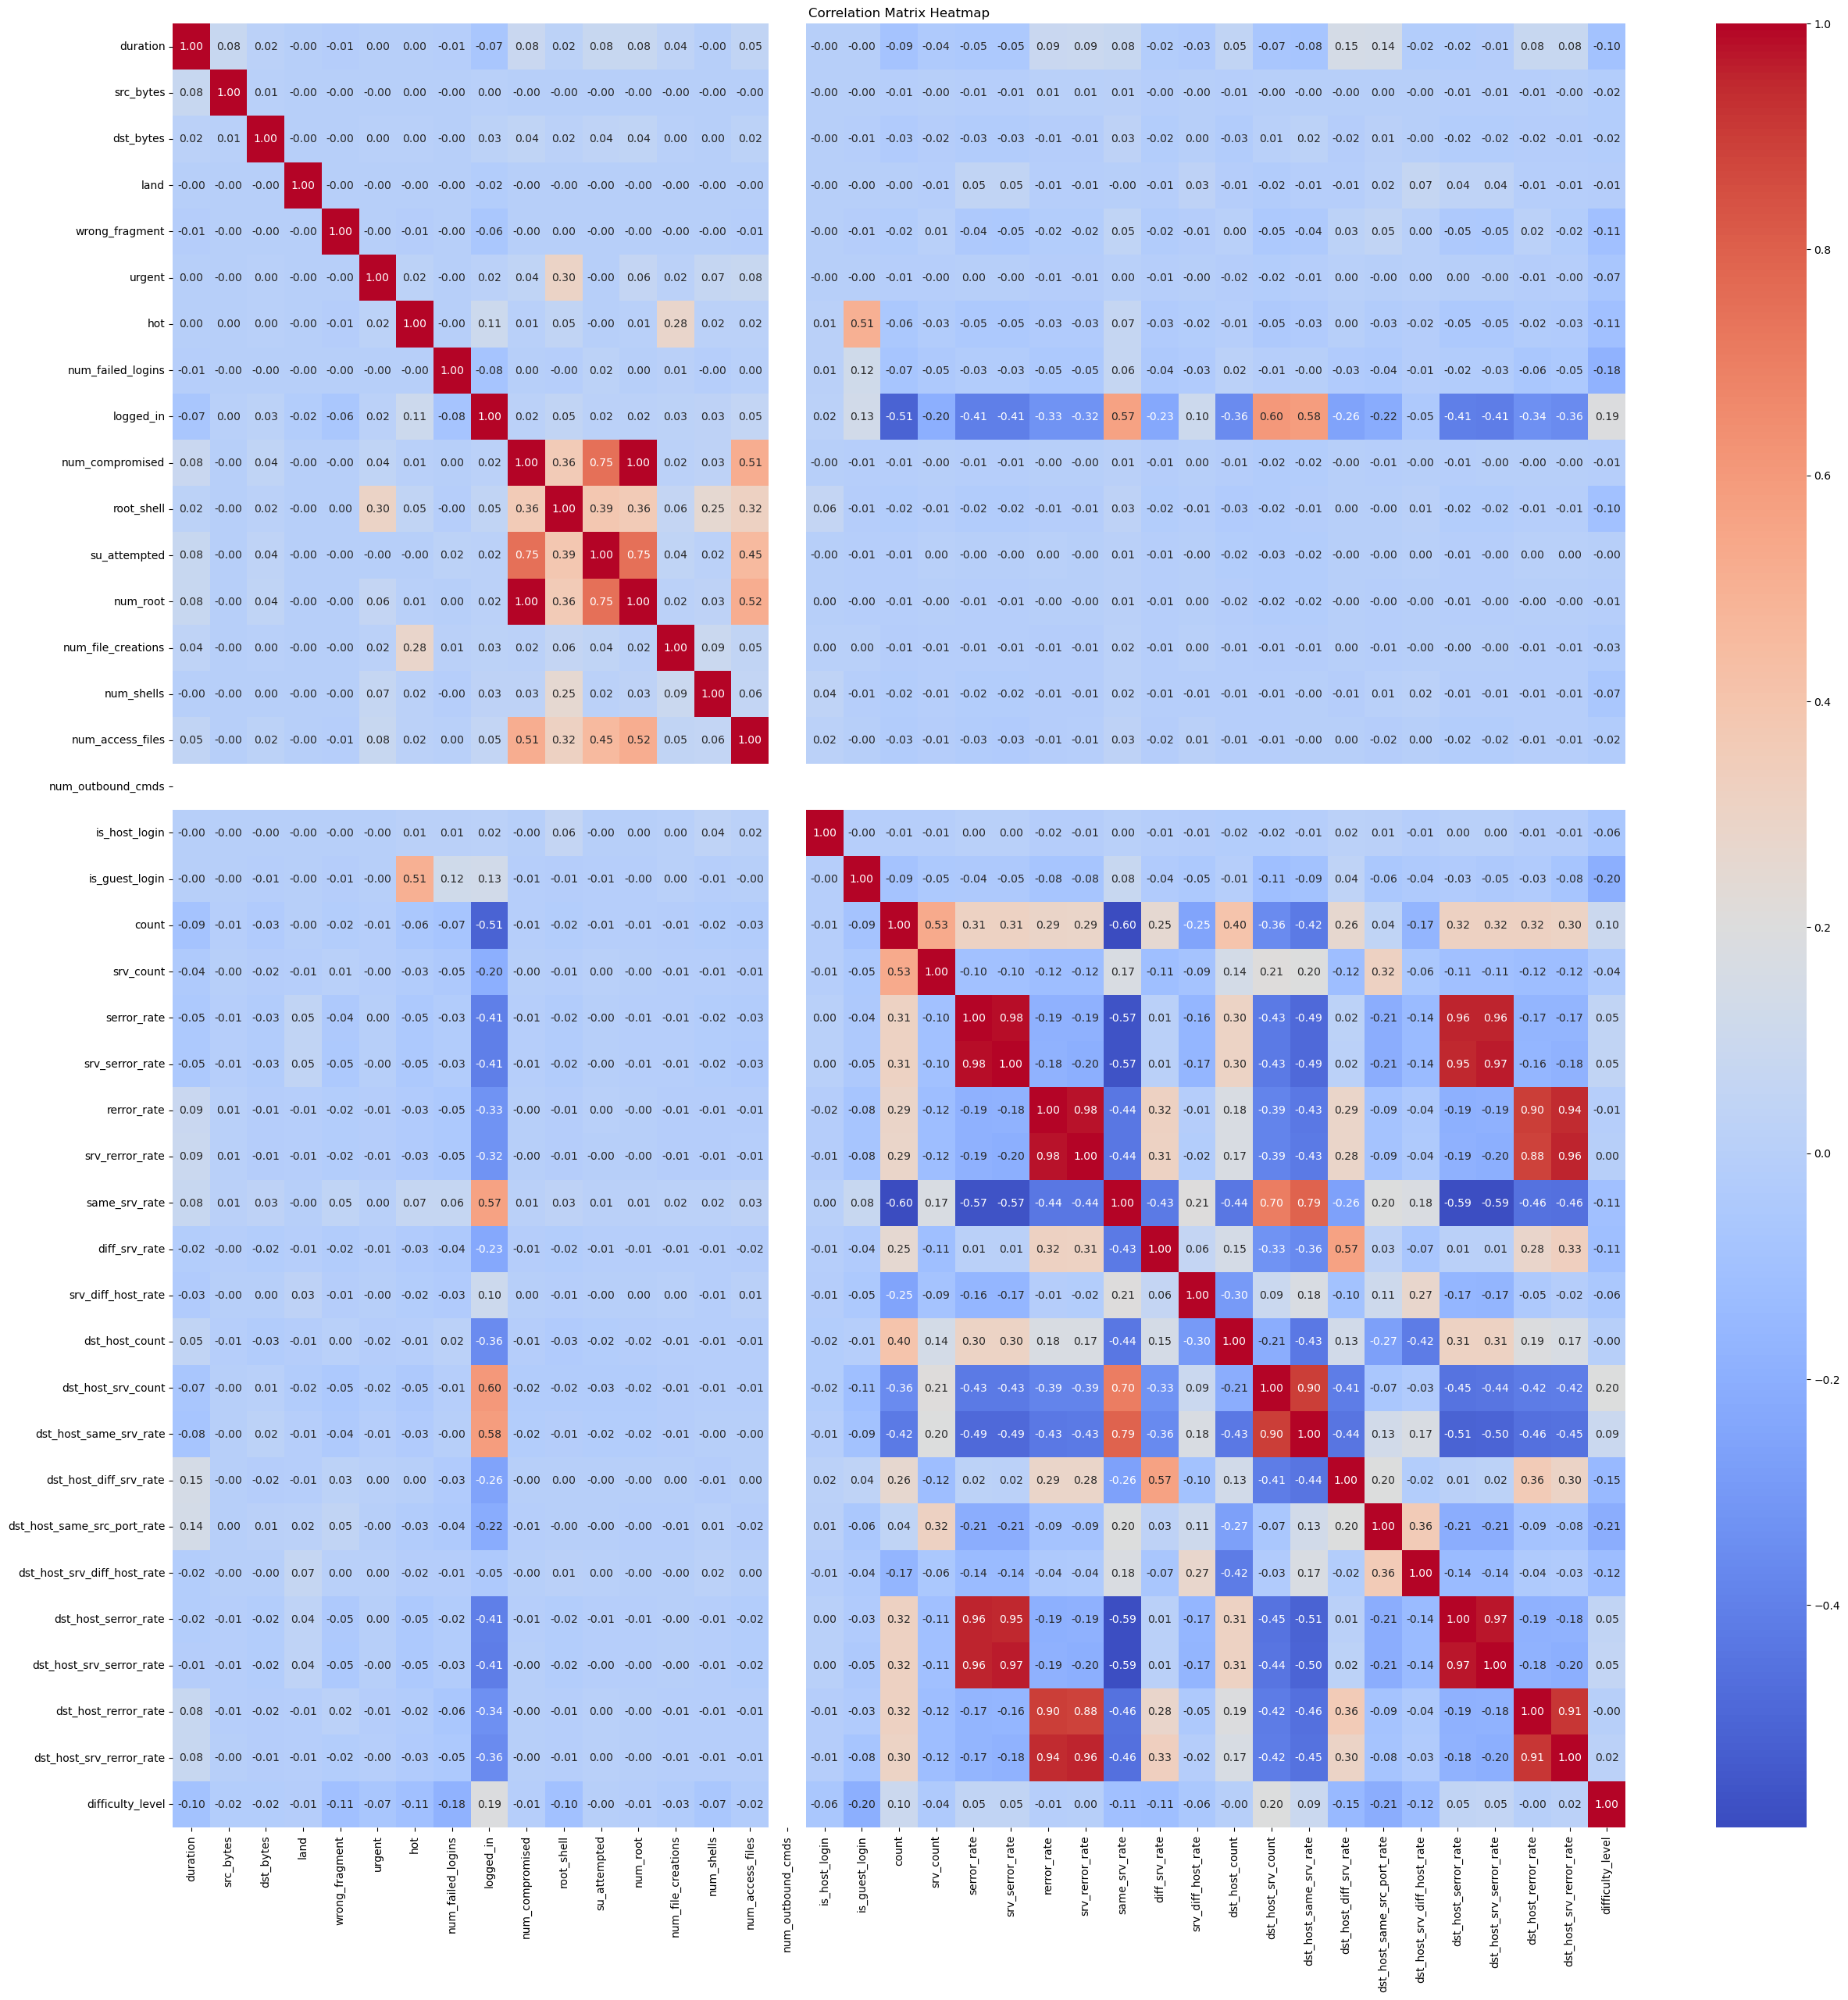

In [12]:
 data=data_train +data_test # regrouping the data set together
correlation_matrix_heatMap(data)

In [66]:
def find_highly_correlated_features(data):
    threshold=0.75 # dapres madame stat :)
    correlation_matrix = data.corr()
    correlated_features = np.where(np.abs(correlation_matrix) > threshold)
    correlated_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*correlated_features)
                           if x != y and x < y]
    
    correlated_features_dict = {}
    for f1, f2 in correlated_features:
        if f1 not in correlated_features_dict:
            correlated_features_dict[f1] = [f2]
        else:
            correlated_features_dict[f1].append(f2)

    return correlated_features_dict

In [67]:
highly_correlated = find_highly_correlated_features(data)

for feature, correlated in highly_correlated.items():
    print(f"Feature '{feature}' is highly correlated with: [ {' , '.join(correlated)} ]")

C:\Users\Brinsi\AppData\Local\Temp\ipykernel_4768\4201506974.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Feature 'num_compromised' is highly correlated with: [ num_root ]
Feature 'serror_rate' is highly correlated with: [ srv_serror_rate , dst_host_serror_rate , dst_host_srv_serror_rate ]
Feature 'srv_serror_rate' is highly correlated with: [ dst_host_serror_rate , dst_host_srv_serror_rate ]
Feature 'rerror_rate' is highly correlated with: [ srv_rerror_rate , dst_host_rerror_rate , dst_host_srv_rerror_rate ]
Feature 'srv_rerror_rate' is highly correlated with: [ dst_host_rerror_rate , dst_host_srv_rerror_rate ]
Feature 'same_srv_rate' is highly correlated with: [ dst_host_same_srv_rate ]
Feature 'dst_host_srv_count' is highly correlated with: [ dst_host_same_srv_rate ]
Feature 'dst_host_serror_rate' is highly correlated with: [ dst_host_srv_serror_rate ]
Feature 'dst_host_rerror_rate' is highly correlated with: [ dst_host_srv_rerror_rate ]



<div style="background-color: yellow; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Attention:</strong> <br>
    we have to drop features in the data preparation which are highly correlated to eliminate redundancy  
</div>


<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
III. Data Preparation:</p><br>

## 1) Checking for NAN values :

In [68]:
print(data_train.isnull().values.any())
print(data_test.isnull().values.any())

False
False


## 2) Checking for Duplicates values :

In [69]:
#Checking for duplicates in the Xtrain 
duplicate_data_train = data_train[data_train.duplicated(keep = 'last')]
duplicate_data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
3882,0,icmp,eco_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16
5142,0,icmp,ecr_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
19299,0,icmp,eco_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13
23632,0,icmp,ecr_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
40577,0,icmp,eco_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15
64513,0,icmp,ecr_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
72383,0,icmp,ecr_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
79859,0,icmp,ecr_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
82966,0,icmp,eco_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16


In [17]:
data_train = data_train.drop_duplicates()
data_test = data_test.drop_duplicates()

## Droping coorelated features:


there are only three categorical features (protocol, service and flag) that are not
independent from each other so We have removed only the service and flag  

In [70]:
data_train = data_train.drop(columns=['flag','service'],axis=1)
data_test= data_test.drop(columns=['flag','service'],axis=1)

In [71]:
data_test = data_test[data_test['protocol_type'] == 'tcp']
data_train = data_train[data_train['protocol_type'] == 'tcp']

data_test = data_test.drop('protocol_type', axis=1)
data_train = data_train.drop('protocol_type', axis=1)

In [20]:
data_train.shape

(102689, 39)

In [21]:
features_to_drop = ['hot', 'logged_in', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted',
                    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'urgent']

data_test = data_test.drop(features_to_drop, axis=1)
data_train = data_train.drop(features_to_drop, axis=1)

In [22]:
data_train.shape

(102689, 26)

Like we have noticed in the heatmap correlation , we're going to drop num_outbound_cmds

In [23]:
data_test = data_test.drop('num_outbound_cmds', axis=1)
data_train = data_train.drop('num_outbound_cmds', axis=1)

In [24]:
data_train.shape

(102689, 25)

In [25]:
data_test = data_test.drop('difficulty_level', axis=1)
data_train = data_train.drop('difficulty_level', axis=1)

In [26]:
data_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
2,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00


## d_raw: The original NSL dataset without any transformation of the numerical values

In [27]:
d_raw=data_train

## Normalization
### d_norm: The original NSL dataset with the normal training values normal-ized to the range [0-1] and the remaining values normalized according to the previous scaler.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d_norm = scaler.fit_transform(d_raw)
data_test_scaled = scaler.transform(data_test)
d_norm = pd.DataFrame(d_norm, columns=d_raw.columns)




In [29]:
d_norm

,duration,src_bytes,dst_bytes,land,wrong_fragment,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.003914,0.012270,0.00,0.00,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.240705,0.036810,1.00,1.00,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.009785,0.030675,0.20,0.20,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.058708,0.196319,0.00,0.00,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.236791,0.116564,0.00,0.00,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.0,2.601517e-07,2.862732e-07,0.0,0.0,0.005871,0.067485,0.33,0.09,0.0,0.0,1.00,0.00,0.18,0.011765,1.000000,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00
102685,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.360078,0.153374,1.00,1.00,0.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
102686,0.0,1.616709e-06,2.931438e-07,0.0,0.0,0.001957,0.006135,0.00,0.00,0.0,0.0,1.00,0.00,0.00,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
102687,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.281800,0.049080,1.00,1.00,0.0,0.0,0.06,0.05,0.00,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


### d_raw_pca: The uncorrelated version of the original NSL dataset with the same number of features.

In [30]:
from sklearn.decomposition import PCA
# Apply PCA to training data
d_raw_PCA=d_raw 
pca_train = PCA()
principal_components_train = pca_train.fit_transform(d_raw_PCA)

# Apply PCA to test data
pca_test = PCA()

# Explained variance ratio
explained_variance_ratio_train = pca_train.explained_variance_ratio_


d_raw_PCA

,duration,src_bytes,dst_bytes,land,wrong_fragment,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,2,2,0.00,0.00,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
2,0,0,0,0,0,123,6,1.00,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,5,5,0.20,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,30,32,0.00,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0,0,0,0,0,121,19,0.00,0.00,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,359,375,0,0,3,11,0.33,0.09,0.0,0.0,1.00,0.00,0.18,3,255,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00
125968,0,0,0,0,0,184,25,1.00,1.00,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125970,0,2231,384,0,0,1,1,0.00,0.00,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,0,0,0,0,144,8,1.00,1.00,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


### d_norm_pca: The uncorrelated version of the normalized dataset :

In [31]:
from sklearn.decomposition import PCA
# Apply PCA to training data
d_norm_pca=d_norm
pca_train = PCA()
principal_components_train = pca_train.fit_transform(d_norm_pca)

# Explained variance ratio
explained_variance_ratio_train = pca_train.explained_variance_ratio_

d_norm_pca = pd.DataFrame(d_norm_pca, columns=d_raw.columns)

d_norm_pca

,duration,src_bytes,dst_bytes,land,wrong_fragment,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.003914,0.012270,0.00,0.00,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.240705,0.036810,1.00,1.00,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.009785,0.030675,0.20,0.20,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.058708,0.196319,0.00,0.00,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.236791,0.116564,0.00,0.00,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.0,2.601517e-07,2.862732e-07,0.0,0.0,0.005871,0.067485,0.33,0.09,0.0,0.0,1.00,0.00,0.18,0.011765,1.000000,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00
102685,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.360078,0.153374,1.00,1.00,0.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
102686,0.0,1.616709e-06,2.931438e-07,0.0,0.0,0.001957,0.006135,0.00,0.00,0.0,0.0,1.00,0.00,0.00,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
102687,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.281800,0.049080,1.00,1.00,0.0,0.0,0.06,0.05,0.00,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


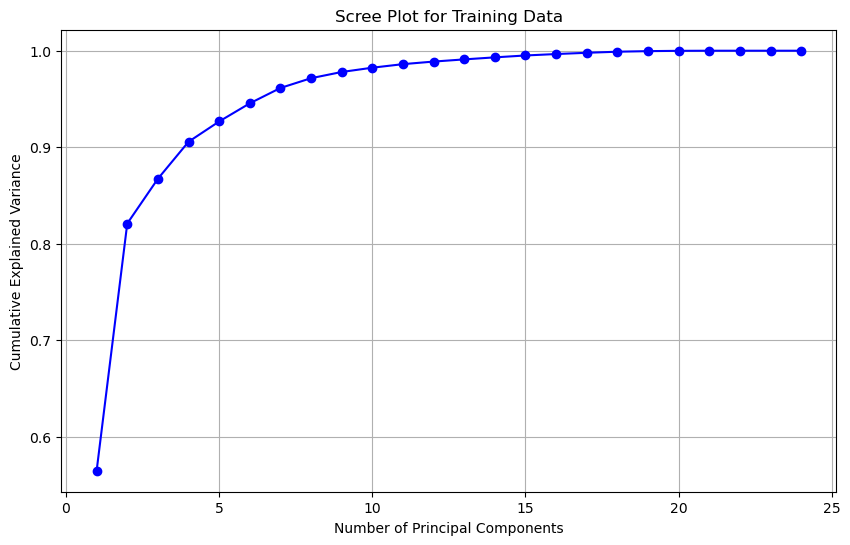

In [32]:
cumulative_variance_train = np.cumsum(explained_variance_ratio_train)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_train) + 1), cumulative_variance_train, marker='o', linestyle='-', color='b')
plt.title('Scree Plot for Training Data')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



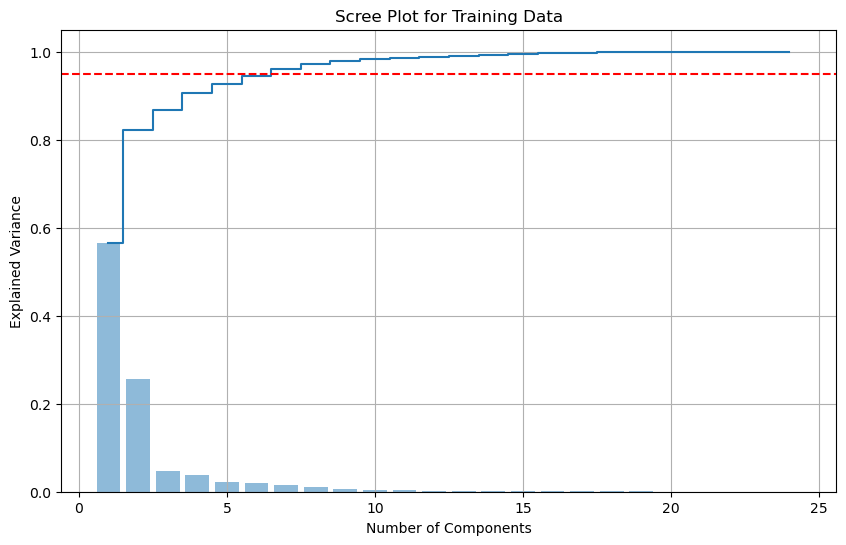

In [33]:
# Create the scree plot for data_train
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio_train) + 1), explained_variance_ratio_train, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio_train) + 1), np.cumsum(explained_variance_ratio_train), where='mid')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for Training Data')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.grid()
plt.show()

We can see that the number of the cumulative explained variance scree plot is often more informative for deciding how many principal components to retain. It shows the cumulative explained variance as you add more principal components
we remarke that we need 6 features to obtain the 95% thresh hold so we should retain those 6 components.

In [34]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# pca_train = PCA()
# data_train_scaled = StandardScaler().fit_transform(data_train)
# principal_components_train = pca_train.fit_transform(data_train_scaled)
# data_train_pca_inverse = pca_train.inverse_transform(principal_components_train)
# data_train_scaled_inverse = StandardScaler().fit(data_train).inverse_transform(data_train_pca_inverse)
# data_tr = pd.DataFrame(data_train_scaled_inverse, columns=data_train.columns)
# pca_test = PCA()
# data_test_scaled = StandardScaler().fit_transform(data_test)
# principal_components_test = pca_test.fit_transform(data_test_scaled)
# data_test_pca_inverse = pca_test.inverse_transform(principal_components_test)
# data_test_scaled_inverse = StandardScaler().fit(data_test).inverse_transform(data_test_pca_inverse)
# data_ts = pd.DataFrame(data_test_scaled_inverse, columns=data_test.columns)


In [35]:
# data_tr= data_tr.drop(columns=['wrong_fragment','dst_bytes','srv_diff_host_rate','duration','src_bytes','land','diff_srv_rate','dst_host_count','srv_count','count','dst_host_srv_rerror_rate'],axis=1)


In [36]:
# data_ts= data_ts.drop(columns=['wrong_fragment','dst_bytes','src_bytes','srv_diff_host_rate','duration','dst_host_srv_diff_host_rate','land','diff_srv_rate','srv_count','dst_host_count','srv_count','count','dst_host_srv_rerror_rate'],axis=1)


## Gaussian Mixture Probability Model

In [37]:
# import matplotlib.pyplot as plt
# from sklearn.mixture import GaussianMixture

# n_components = 5
# gmm = GaussianMixture(n_components=n_components, random_state=13)
# gmm.fit(data_tr)
# latent_components_train = gmm.predict(data_tr)
# num_features = data_tr.shape[1]
# if num_features == 1:
# #     fig, axes = plt.subplots()
#     axes.scatter(data_tr.iloc[:, 0], data_tr.iloc[:, 0], c=latent_components_train, cmap='viridis', marker='.')
#     axes.set_xlabel(data_tr.columns[0])
#     axes.set_ylabel(data_tr.columns[0])
# else:
#     fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

#     for i in range(num_features):
#         for j in range(num_features):
#             if i != j:
#                 axes[i, j].scatter(data_tr.iloc[:, i], data_tr.iloc[:, j], c=latent_components_train, cmap='viridis', marker='.')
#                 axes[i, j].set_xlabel(data_tr.columns[i])
#                 axes[i, j].set_ylabel(data_tr.columns[j])

# plt.suptitle('Graphiques de dispersion avec les composantes latentes prédites', y=1.02)
# plt.tight_layout()
# plt.show()


## K-means

In [38]:
# à installer si c'est la première à utiliser yellowbrick.cluster
#!pip install yellowbrick

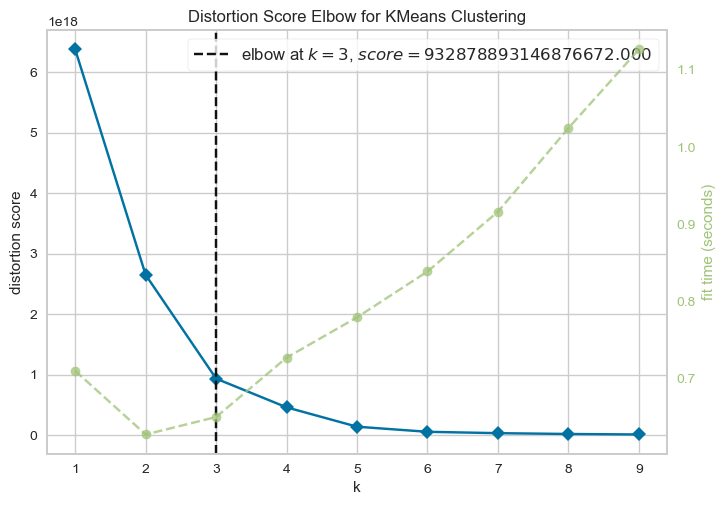

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(d_raw)   # Fit the data to the visualizer
visualizer.show()  

    Based on the elbow graphe we can see that we need only 3 clusters in the train data as said also in the article 

## Construction of the model K-means (KM-D) for the dataset d_norm :

In [40]:
model1=KMeans(n_clusters=3, random_state=42)
model1.fit(d_norm)


C:\Users\Brinsi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [41]:
labels = np.where(model1.labels_ <= 1, 'Normal', 'Abnormal')
distances_to_centroids = model1.transform(d_norm)
df_results = pd.DataFrame({'Observation': d_norm.index, 'Assigned_Cluster': labels})
df_results['Distance_to_Centroid'] = distances_to_centroids[np.arange(len(distances_to_centroids)), model1.labels_]
percentage_by_cluster = pd.DataFrame(distances_to_centroids, columns=[f'Cluster_{i}' for i in range(model1.n_clusters)])
percentage_by_cluster['Assigned_Cluster'] = labels
percentage_by_cluster['Observation'] = d_norm.index
percentage_by_cluster.iloc[:, :-2] = percentage_by_cluster.iloc[:, :-2].apply(lambda x: x / x.sum() * 100, axis=1)
print(df_results)
print(percentage_by_cluster)

        Observation Assigned_Cluster  Distance_to_Centroid
0                 0           Normal              0.955552
1                 1           Normal              0.137716
2                 2           Normal              0.583244
3                 3           Normal              0.592877
4                 4         Abnormal              0.493620
...             ...              ...                   ...
102684       102684           Normal              0.777532
102685       102685           Normal              0.117058
102686       102686           Normal              1.296810
102687       102687           Normal              0.103875
102688       102688           Normal              0.889512

[102689 rows x 3 columns]
        Cluster_0  Cluster_1  Cluster_2 Assigned_Cluster  Observation
0       18.225303  42.766817  39.007881           Normal            0
1       45.496175   2.544441  51.959384           Normal            1
2       10.380964  45.497130  44.121906           Norma

In [42]:
import numpy as np
import pandas as pd

# Update cluster assignments
labels = np.where(model1.labels_ == 0, 'Normal', np.where(model1.labels_ == 1, 'Abnormal', 'Normal'))

distances_to_centroids = model1.transform(d_norm)
df_results = pd.DataFrame({'Observation': d_norm.index, 'Assigned_Cluster': labels})
df_results['Distance_to_Centroid'] = distances_to_centroids[np.arange(len(distances_to_centroids)), model1.labels_]

percentage_by_cluster = pd.DataFrame(distances_to_centroids, columns=[f'Cluster_{i}' for i in range(model1.n_clusters)])
percentage_by_cluster['Assigned_Cluster'] = labels
percentage_by_cluster['Observation'] = d_norm.index
percentage_by_cluster.iloc[:, :-2] = percentage_by_cluster.iloc[:, :-2].apply(lambda x: x / x.sum() * 100, axis=1)

print(df_results)
print(percentage_by_cluster)

total_normal1= np.sum(labels == 'Normal')
total_abnormal1= np.sum(labels == 'Abnormal')

print(f'Total observations in normal clusters: {total_normal1}')
print(f'Total observations in abnormal cluster: {total_abnormal}')


        Observation Assigned_Cluster  Distance_to_Centroid
0                 0           Normal              0.955552
1                 1         Abnormal              0.137716
2                 2           Normal              0.583244
3                 3           Normal              0.592877
4                 4           Normal              0.493620
...             ...              ...                   ...
102684       102684           Normal              0.777532
102685       102685         Abnormal              0.117058
102686       102686           Normal              1.296810
102687       102687         Abnormal              0.103875
102688       102688           Normal              0.889512

[102689 rows x 3 columns]
        Cluster_0  Cluster_1  Cluster_2 Assigned_Cluster  Observation
0       18.225303  42.766817  39.007881           Normal            0
1       45.496175   2.544441  51.959384         Abnormal            1
2       10.380964  45.497130  44.121906           Norma

NameError: name 'total_abnormal' is not defined

In [ ]:
import numpy as np
import pandas as pd

# Assuming labels are assigned as 'Normal' and 'Abnormal' based on model1.labels_
labels = np.where(model1.labels_ <= 1, 'Normal', 'Abnormal')

# Determine which cluster is considered normal and abnormal
normal_cluster = np.unique(model1.labels_[labels == 'Normal'])
abnormal_cluster = np.unique(model1.labels_[labels == 'Abnormal'])

print(f'Cluster(s) considered as Normal: {normal_cluster}')
print(f'Cluster(s) considered as Abnormal: {abnormal_cluster}')

# Rest of your code
distances_to_centroids = model1.transform(d_norm)
df_results = pd.DataFrame({'Observation': d_norm.index, 'Assigned_Cluster': labels})
df_results['Distance_to_Centroid'] = distances_to_centroids[np.arange(len(distances_to_centroids)), model1.labels_]
percentage_by_cluster = pd.DataFrame(distances_to_centroids, columns=[f'Cluster_{i}' for i in range(model1.n_clusters)])
percentage_by_cluster['Assigned_Cluster'] = labels
percentage_by_cluster['Observation'] = d_norm.index
percentage_by_cluster.iloc[:, :-2] = percentage_by_cluster.iloc[:, :-2].apply(lambda x: x / x.sum() * 100, axis=1)

print(df_results)
print(percentage_by_cluster)


In [ ]:
labels = np.where(model1.labels_ == 1, 'Normal', 'Abnormal')
normal_cluster = np.unique(model1.labels_[labels == 'Normal'])
abnormal_cluster = np.unique(model1.labels_[labels == 'Abnormal'])
distances_to_centroids = model1.transform(d_norm)
df_results = pd.DataFrame({'Observation': d_norm.index, 'Assigned_Cluster': labels})
df_results['Distance_to_Centroid'] = distances_to_centroids[np.arange(len(distances_to_centroids)), model1.labels_]
percentage_by_cluster = pd.DataFrame(distances_to_centroids, columns=[f'Cluster_{i}' for i in range(model1.n_clusters)])
percentage_by_cluster['Assigned_Cluster'] = labels
percentage_by_cluster['Observation'] = d_norm.index
percentage_by_cluster.iloc[:, :-2] = percentage_by_cluster.iloc[:, :-2].apply(lambda x: x / x.sum() * 100, axis=1)

print(df_results)
print(percentage_by_cluster)


## Construction of the model K-means (KM-D) for the dataset d_norm_probs :

## Construction of the model K-means (KM-D) for the dataset d_norm_pca :

## Construction of the model K-means (KM-D) for the dataset d_norm_pca_probs, :

## Construction of the model K-means (KM-D) for the dataset d_raw :

## Construction of the model K-means (KM-D) for the dataset d_raw_probs:

## Construction of the model K-means (KM-D) for the dataset d_raw_pca :

The silouhette score provides a measure of how well-separated clusters are in a clustering algorithm.

The silhouette score is calculated for each data point and measures how similar it is to its own cluster (intra-cluster similarity) compared to the nearest neighboring cluster (inter-cluster dissimilarity). The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In the context of silhouette score:

A score close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters, suggesting a good clustering.

A score around 0 indicates overlapping clusters.

A score close to -1 indicates that the object may be assigned to the wrong cluster.

In [ ]:
colormap=np.array(['Red','green','bleu'])

plt.scatter(d_norm_pc.dst_host_serror_rate, d_raw.dst_host_srv_count,c=colormap[model1.labels_])

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Assuming X is your data
# Replace X with your actual data

# Creating figure
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection="3d")

# Add x, y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.3, alpha=0.2)

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(data_tr.dst_host_serror_rate, data_tr.dst_host_srv_count, data_tr.serror_rate, alpha=0.8,
                    c=(data_tr.dst_host_serror_rate+data_tr.dst_host_srv_count + data_tr.serror_rate),
                    cmap=my_cmap,
                    marker='^')

plt.title("Animated 3D Scatter Plot")
ax.set_xlabel('X-axis', fontweight='bold')
ax.set_ylabel('Y-axis', fontweight='bold')
ax.set_zlabel('Z-axis', fontweight='bold')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)
def update(frame):
    ax.view_init(elev=20, azim=frame)  # Rotate the view around the azimuthal axis
    return sctt,
animation = FuncAnimation(fig, update, frames=range(0, 360, 2), interval=50)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection="3d")
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.3, alpha=0.2)
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(data_tr.dst_host_serror_rate, data_tr.dst_host_srv_count, data_tr.serror_rate, alpha=0.8,
c=(data_tr.dst_host_serror_rate+data_tr.dst_host_srv_count + data_tr.serror_rate),
cmap=my_cmap,marker='^')
plt.title("Animated 3D Scatter Plot")
ax.set_xlabel('X-axis', fontweight='bold')
ax.set_ylabel('Y-axis', fontweight='bold')
ax.set_zlabel('Z-axis', fontweight='bold')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)
def update(frame):
    ax.view_init(elev=20, azim=frame)  
    return sctt,
animation = FuncAnimation(fig, update, frames=range(0, 360, 2), interval=50)
html_output = animation.to_jshtml()
HTML(html_output)


In [ ]:
import numpy as np
import pandas as pd
labels = np.where(model1.labels_ == 0, 'Abnormal', np.where(model1.labels_ == 1, 'Normal', 'Abnormal'))
distances_to_centroids = model1.transform(data_tr)
df_results = pd.DataFrame({'Observation': data_tr.index, 'Assigned_Cluster': labels})
df_results['Distance_to_Centroid'] = distances_to_centroids[np.arange(len(distances_to_centroids)), model1.labels_]

percentage_by_cluster = pd.DataFrame(distances_to_centroids, columns=[f'Cluster_{i}' for i in range(model1.n_clusters)])
percentage_by_cluster['Assigned_Cluster'] = labels
percentage_by_cluster['Observation'] = data_tr.index
percentage_by_cluster.iloc[:, :-2] = percentage_by_cluster.iloc[:, :-2].apply(lambda x: x / x.sum() * 100, axis=1)

print(df_results)
print(percentage_by_cluster)

# Calculate total observations in normal and abnormal clusters
total_normal2 = np.sum(labels == 'Normal')
total_abnormal2 = np.sum(labels == 'Abnormal')

print(f'Total observations in normal clusters: {total_normal2}')
print(f'Total observations in abnormal cluster: {total_abnormal2}')


## Construction of the model K-means (KM-C) for the dataset d_norm :

## GMM

## KDE 

## d_raw_probs: We apply the FGMPM to the original NSL dataset values and change each feature value for the occurrence probability of each feature in the normal model. 

C:\Users\Brinsi\AppData\Local\Temp\ipykernel_4768\418828564.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=20`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data=subset_data, x=feature, fill=True, label=feature,bw=20)
C:\Users\Brinsi\AppData\Local\Temp\ipykernel_4768\418828564.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=20`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data=subset_data, x=feature, fill=True, label=feature,bw=20)
C:\Users\Brinsi\AppData\Local\Temp\ipykernel_4768\418828564.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=20`, but please see the docs for the new parameters
and update your code. This will be

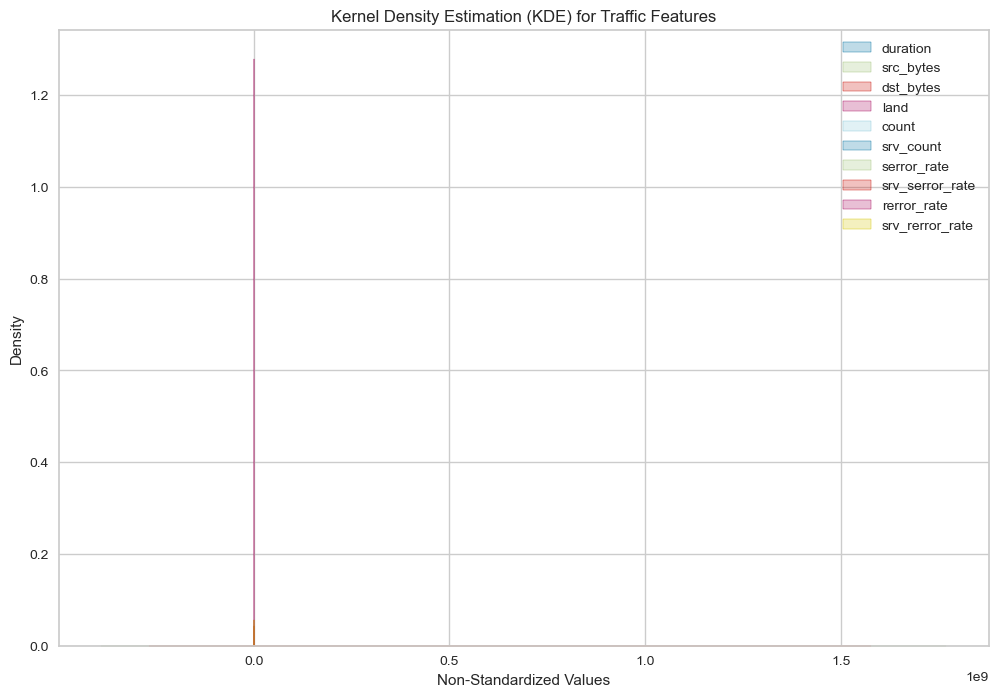

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate']
subset_data = d_raw[selected_features]
plt.figure(figsize=(12, 8))
for feature in selected_features:
    sns.kdeplot(data=subset_data, x=feature, fill=True, label=feature,bw=20)
plt.title('Kernel Density Estimation (KDE) for Traffic Features')
plt.xlabel('Non-Standardized Values')
plt.ylabel('Density')
plt.legend()
plt.show()


### d_norm_probs: We apply the FGPM to the normalized version of the dataset : 

C:\Users\Brinsi\AppData\Local\Temp\ipykernel_4768\1562017088.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=20`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data=subset_data, x=feature, fill=True, label=feature,bw=20)
C:\Users\Brinsi\AppData\Local\Temp\ipykernel_4768\1562017088.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=20`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data=subset_data, x=feature, fill=True, label=feature,bw=20)
C:\Users\Brinsi\AppData\Local\Temp\ipykernel_4768\1562017088.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=20`, but please see the docs for the new parameters
and update your code. This will

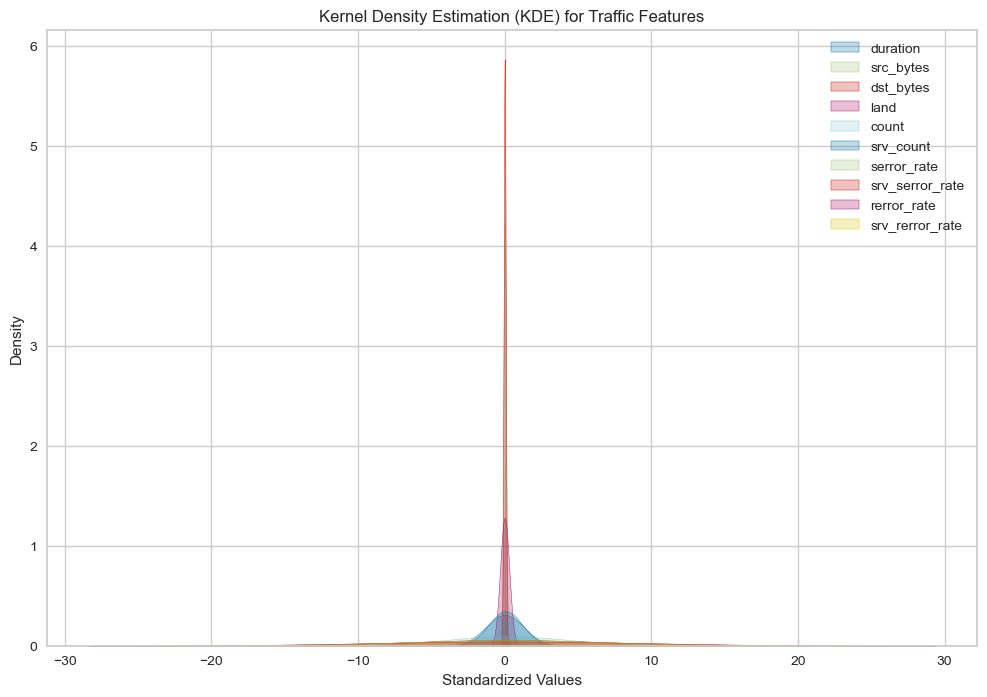

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate']
subset_data = d_norm[selected_features]
plt.figure(figsize=(12, 8))
for feature in selected_features:
    sns.kdeplot(data=subset_data, x=feature, fill=True, label=feature,bw=20)
plt.title('Kernel Density Estimation (KDE) for Traffic Features')
plt.xlabel('Standardized Values')
plt.ylabel('Density')
plt.legend()
plt.show()


### d_norm_pca_probs: The occurrence probabilities of the uncorrelated features of the normalized dataset :

C:\Users\Brinsi\AppData\Local\Temp\ipykernel_4768\3551832766.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=20`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data=subset_data, x=feature, fill=True, label=feature,bw=20)
C:\Users\Brinsi\AppData\Local\Temp\ipykernel_4768\3551832766.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=20`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data=subset_data, x=feature, fill=True, label=feature,bw=20)
C:\Users\Brinsi\AppData\Local\Temp\ipykernel_4768\3551832766.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=20`, but please see the docs for the new parameters
and update your code. This will

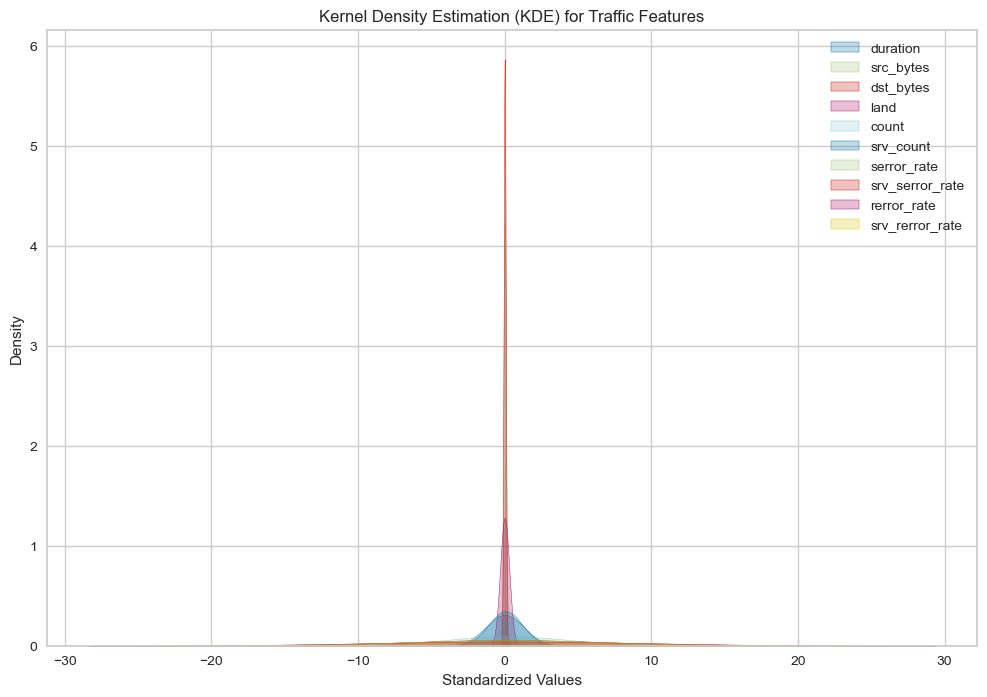

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate']
subset_data = d_norm_pca[selected_features]
plt.figure(figsize=(12, 8))
for feature in selected_features:
    sns.kdeplot(data=subset_data, x=feature, fill=True, label=feature,bw=20)
plt.title('Kernel Density Estimation (KDE) for Traffic Features')
plt.xlabel('Standardized Values')
plt.ylabel('Density')
plt.legend()
plt.show()


as we can see the most high density is provided by dst_bytes so it affects more the trafic and then we have srv_serror rate ,and then land and rerror rate and finally we have srv_count , duration and count .

Kde provides  insights into the distribution of values for each traffic feature in d_raw The shape of the KDE plot indicates the density of data points at different values of the features.
Dst_bytes (Destination Bytes): This feature has the highest density, indicating that there are many data points concentrated around certain values of dst_bytes. This suggests that dst_bytes is a significant and commonly occurring feature in
data_tr.
Srv_serror_rate (Server SYN Error Rate): This feature has the second-highest density. The higher density suggests that the distribution of srv_serror_rate values is concentrated around specific values.

Land: The land feature has a notable density, suggesting that there are certain conditions where the source and destination are the same host/port (land connections), and these conditions occur frequently enough to contribute to the overall density.

Rerror_rate (Error Rate): The density of the rerror_rate feature is also noteworthy, indicating that certain error rates occur more frequently in the dataset.

Srv_count (Server Count): The density of srv_count is lower compared to the previous features, suggesting that the distribution of server counts is more spread out, and there is less concentration around specific values.

Duration: The density of the duration feature is lower than some other features, suggesting a broader range of durations in the dataset.

Count: The density of the count feature is also relatively lower, indicating a spread of connection counts in the dataset.

## Probability Voting Scheme

## Probability Voting Scheme for d_norm_probs :

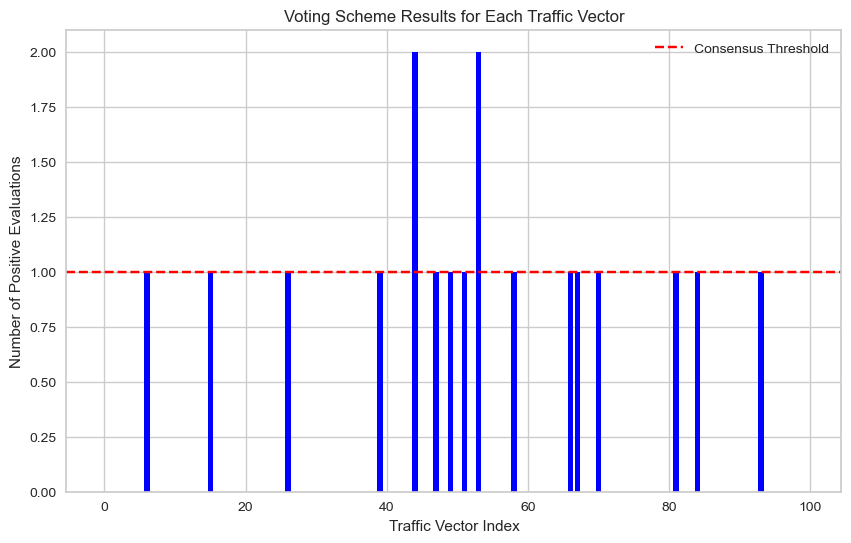

The entire traffic vector is classified as anomalous.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Sample data generation (replace this with your actual dataset)
np.random.seed(42)
d_norm_probs = np.random.rand(100, 10)  # 100 samples with 10 features

# Example: Replace this with your actual logic for computing feature probabilities
def compute_feature_probabilities(data, gmm):
    return gmm.score_samples(data)

# Example: Replace this with your actual logic for computing positive evaluations
def compute_positive_evaluations(data, threshold):
    return np.sum(data > threshold, axis=1)

# Hyperparameters
alpha = 0.05  # Example: 5% error tolerance for normal features
consensus = 1

# Assuming 'data_tr' is your dataset
# Assuming 'gmm' is your trained Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, init_params='random', random_state=42)
gmm.fit(d_norm_probs)

# Compute feature probabilities
feature_probabilities = compute_feature_probabilities(d_norm_probs, gmm)

# Compute threshold for decision making
threshold = np.percentile(feature_probabilities, 100 * (1 - alpha))

# Calculate positive evaluations for each traffic vector
positive_evaluations = compute_positive_evaluations(d_norm_probs, threshold)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(positive_evaluations)), positive_evaluations, color='blue')
plt.axhline(y=consensus, color='red', linestyle='--', label='Consensus Threshold')
plt.xlabel('Traffic Vector Index')
plt.ylabel('Number of Positive Evaluations')
plt.title('Voting Scheme Results for Each Traffic Vector')
plt.legend()
plt.show()

# Step 7: Determine if the entire vector is anomalous based on consensus
anomalous_vector_count = np.sum(positive_evaluations >= consensus)
if anomalous_vector_count >= consensus:
    print("The entire traffic vector is classified as anomalous.")
else:
    print("The entire traffic vector is classified as normal.")


## Probability Voting Scheme for d_norm_pca_probs :

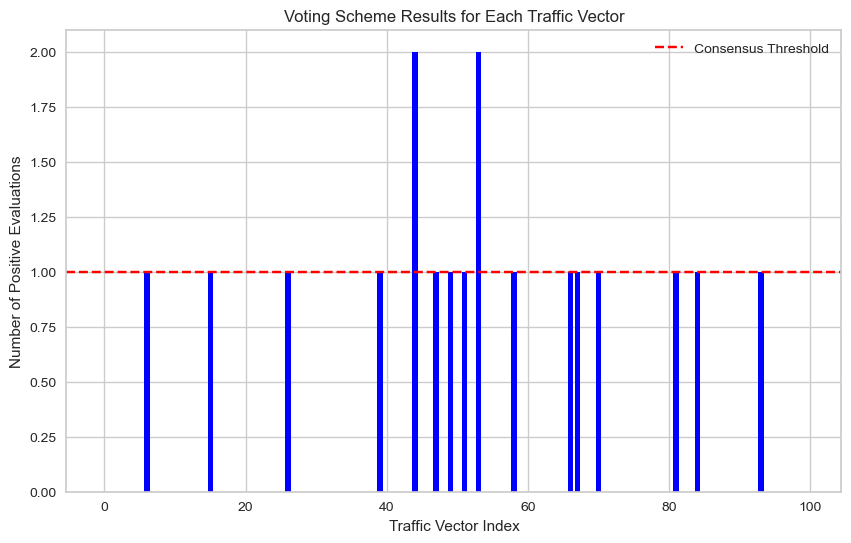

The entire traffic vector is classified as anomalous.


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Sample data generation (replace this with your actual dataset)
np.random.seed(42)
d_norm_pca_probs = np.random.rand(100, 10)  # 100 samples with 10 features

# Example: Replace this with your actual logic for computing feature probabilities
def compute_feature_probabilities(data, gmm):
    return gmm.score_samples(data)

# Example: Replace this with your actual logic for computing positive evaluations
def compute_positive_evaluations(data, threshold):
    return np.sum(data > threshold, axis=1)

# Hyperparameters
alpha = 0.05  # Example: 5% error tolerance for normal features
consensus = 1

# Assuming 'data_tr' is your dataset
# Assuming 'gmm' is your trained Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, init_params='random', random_state=42)
gmm.fit(d_norm_pca_probs)

# Compute feature probabilities
feature_probabilities = compute_feature_probabilities(d_norm_pca_probs, gmm)

# Compute threshold for decision making
threshold = np.percentile(feature_probabilities, 100 * (1 - alpha))

# Calculate positive evaluations for each traffic vector
positive_evaluations = compute_positive_evaluations(d_norm_pca_probs, threshold)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(positive_evaluations)), positive_evaluations, color='blue')
plt.axhline(y=consensus, color='red', linestyle='--', label='Consensus Threshold')
plt.xlabel('Traffic Vector Index')
plt.ylabel('Number of Positive Evaluations')
plt.title('Voting Scheme Results for Each Traffic Vector')
plt.legend()
plt.show()

# Step 7: Determine if the entire vector is anomalous based on consensus
anomalous_vector_count = np.sum(positive_evaluations >= consensus)
if anomalous_vector_count >= consensus:
    print("The entire traffic vector is classified as anomalous.")
else:
    print("The entire traffic vector is classified as normal.")


## Probability Voting Scheme for d_raw_probs :

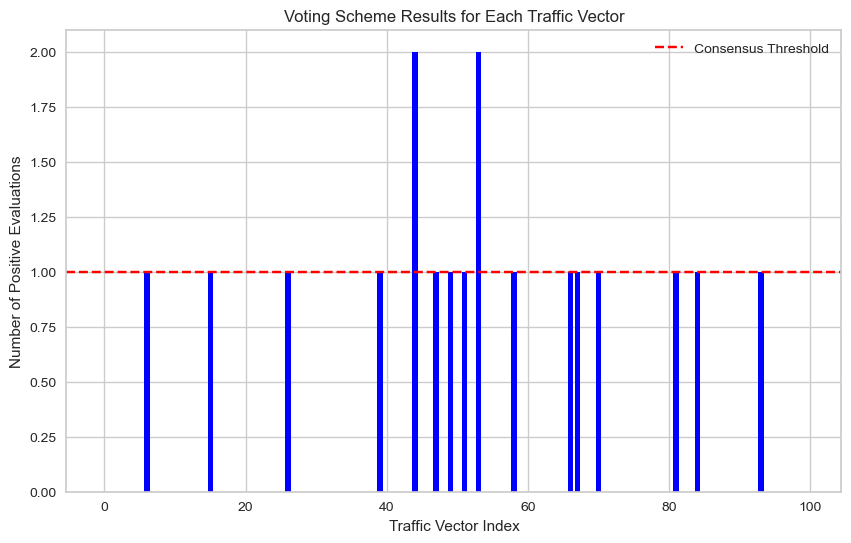

The entire traffic vector is classified as anomalous.


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Sample data generation (replace this with your actual dataset)
np.random.seed(42)
d_raw_probs  = np.random.rand(100, 10)  # 100 samples with 10 features

# Example: Replace this with your actual logic for computing feature probabilities
def compute_feature_probabilities(data, gmm):
    return gmm.score_samples(data)

# Example: Replace this with your actual logic for computing positive evaluations
def compute_positive_evaluations(data, threshold):
    return np.sum(data > threshold, axis=1)

# Hyperparameters
alpha = 0.05  # Example: 5% error tolerance for normal features
consensus = 1

# Assuming 'data_tr' is your dataset
# Assuming 'gmm' is your trained Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, init_params='random', random_state=42)
gmm.fit(d_raw_probs )

# Compute feature probabilities
feature_probabilities = compute_feature_probabilities(d_raw_probs , gmm)

# Compute threshold for decision making
threshold = np.percentile(feature_probabilities, 100 * (1 - alpha))

# Calculate positive evaluations for each traffic vector
positive_evaluations = compute_positive_evaluations(d_raw_probs, threshold)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(positive_evaluations)), positive_evaluations, color='blue')
plt.axhline(y=consensus, color='red', linestyle='--', label='Consensus Threshold')
plt.xlabel('Traffic Vector Index')
plt.ylabel('Number of Positive Evaluations')
plt.title('Voting Scheme Results for Each Traffic Vector')
plt.legend()
plt.show()

# Step 7: Determine if the entire vector is anomalous based on consensus
anomalous_vector_count = np.sum(positive_evaluations >= consensus)
if anomalous_vector_count >= consensus:
    print("The entire traffic vector is classified as anomalous.")
else:
    print("The entire traffic vector is classified as normal.")


## Probability Voting Scheme for d_raw_pca_probs :

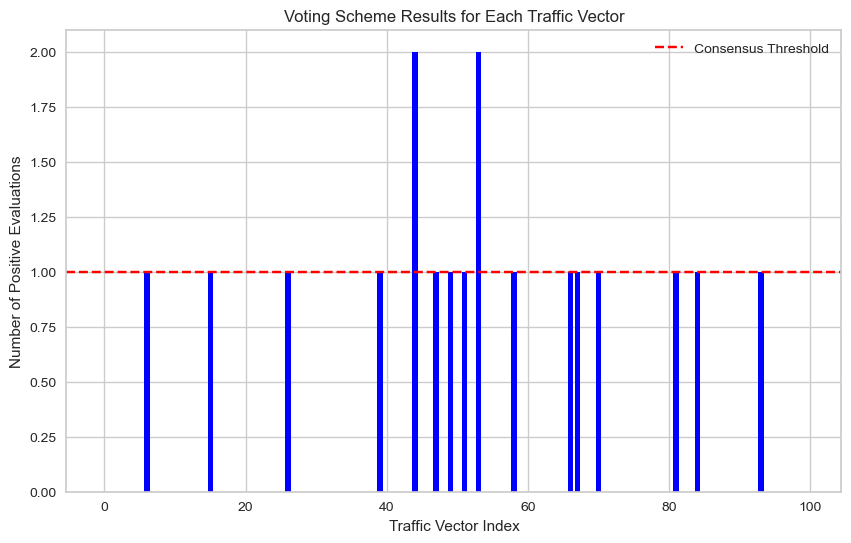

The entire traffic vector is classified as anomalous.


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Sample data generation (replace this with your actual dataset)
np.random.seed(42)
d_raw_pca_probs = np.random.rand(100, 10)  # 100 samples with 10 features

# Example: Replace this with your actual logic for computing feature probabilities
def compute_feature_probabilities(data, gmm):
    return gmm.score_samples(data)

# Example: Replace this with your actual logic for computing positive evaluations
def compute_positive_evaluations(data, threshold):
    return np.sum(data > threshold, axis=1)

# Hyperparameters
alpha = 0.05  # Example: 5% error tolerance for normal features
consensus = 1

# Assuming 'data_tr' is your dataset
# Assuming 'gmm' is your trained Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, init_params='random', random_state=42)
gmm.fit(d_raw_pca_probs)

# Compute feature probabilities
feature_probabilities = compute_feature_probabilities(d_raw_pca_probs, gmm)

# Compute threshold for decision making
threshold = np.percentile(feature_probabilities, 100 * (1 - alpha))

# Calculate positive evaluations for each traffic vector
positive_evaluations = compute_positive_evaluations(d_raw_pca_probs, threshold)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(positive_evaluations)), positive_evaluations, color='blue')
plt.axhline(y=consensus, color='red', linestyle='--', label='Consensus Threshold')
plt.xlabel('Traffic Vector Index')
plt.ylabel('Number of Positive Evaluations')
plt.title('Voting Scheme Results for Each Traffic Vector')
plt.legend()
plt.show()

# Step 7: Determine if the entire vector is anomalous based on consensus
anomalous_vector_count = np.sum(positive_evaluations >= consensus)
if anomalous_vector_count >= consensus:
    print("The entire traffic vector is classified as anomalous.")
else:
    print("The entire traffic vector is classified as normal.")


# SVM

In [ ]:
# from sklearn.svm import OneClassSVM
# class1_svm=OneClassSVM(nu=0.01,kernel='rbf',gamma='auto').fit(data_tr)

## SVM for the dataset d_norm :

In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np
svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
svm_model.fit(d_norm)
predictions = svm_model.predict(d_norm)
predictions_binary = np.where(predictions == -1, 1, 0)
normal_count = np.sum(predictions_binary == 0)
anomaly_count = np.sum(predictions_binary == 1)

# Print the counts
print("Normal instances:", normal_count)
print("Anomalous instances:", anomaly_count)


## SVM for the dataset d_norm_probs :

In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np
svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
svm_model.fit(d_norm_probs)
predictions = svm_model.predict(d_norm_probs)
predictions_binary = np.where(predictions == -1, 1, 0)
normal_count = np.sum(predictions_binary == 0)
anomaly_count = np.sum(predictions_binary == 1)

# Print the counts
print("Normal instances:", normal_count)
print("Anomalous instances:", anomaly_count)


## SVM for the dataset d_norm_pca :

In [ ]:
# from sklearn.svm import OneClassSVM
# import numpy as np
# svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
# svm_model.fit(d_norm_pca)
# predictions = svm_model.predict(d_norm_pca)
# predictions_binary = np.where(predictions == -1, 1, 0)
# normal_count = np.sum(predictions_binary == 0)
# anomaly_count = np.sum(predictions_binary == 1)

# # Print the counts
# print("Normal instances:", normal_count)
# print("Anomalous instances:", anomaly_count)


## SVM for the dataset d_norm_pca_probs :

In [ ]:
# from sklearn.svm import OneClassSVM
# import numpy as np
# svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
# svm_model.fit(d_norm_pca_probs)
# predictions = svm_model.predict(d_norm_pca_probs)
# predictions_binary = np.where(predictions == -1, 1, 0)
# normal_count = np.sum(predictions_binary == 0)
# anomaly_count = np.sum(predictions_binary == 1)

# # Print the counts
# print("Normal instances:", normal_count)
# print("Anomalous instances:", anomaly_count)


## SVM for the dataset d_raw :

In [ ]:
# from sklearn.svm import OneClassSVM
# import numpy as np
# svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
# svm_model.fit(d_raw)
# predictions = svm_model.predict(d_raw)
# predictions_binary = np.where(predictions == -1, 1, 0)
# normal_count = np.sum(predictions_binary == 0)
# anomaly_count = np.sum(predictions_binary == 1)

# # Print the counts
# print("Normal instances:", normal_count)
# print("Anomalous instances:", anomaly_count)


## SVM for the dataset d_raw_probs :

In [ ]:
# from sklearn.svm import OneClassSVM
# import numpy as np
# svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
# svm_model.fit(d_raw_probs)
# predictions = svm_model.predict(d_raw_probs)
# predictions_binary = np.where(predictions == -1, 1, 0)
# normal_count = np.sum(predictions_binary == 0)
# anomaly_count = np.sum(predictions_binary == 1)

# # Print the counts
# print("Normal instances:", normal_count)
# print("Anomalous instances:", anomaly_count)


## SVM for the dataset d_raw_pca :

In [ ]:
# from sklearn.svm import OneClassSVM
# import numpy as np
# svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
# svm_model.fit(d_raw_pca)
# predictions = svm_model.predict(d_raw_pca)
# predictions_binary = np.where(predictions == -1, 1, 0)
# normal_count = np.sum(predictions_binary == 0)
# anomaly_count = np.sum(predictions_binary == 1)

# # Print the counts
# print("Normal instances:", normal_count)
# print("Anomalous instances:", anomaly_count)


## SVM for the dataset d_raw_pca_probs :

In [ ]:
# from sklearn.svm import OneClassSVM
# import numpy as np
# svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
# svm_model.fit(d_raw_pca_probs)
# predictions = svm_model.predict(d_raw_pca_probs)
# predictions_binary = np.where(predictions == -1, 1, 0)
# normal_count = np.sum(predictions_binary == 0)
# anomaly_count = np.sum(predictions_binary == 1)

# # Print the counts
# print("Normal instances:", normal_count)
# print("Anomalous instances:", anomaly_count)


In [ ]:
# from sklearn.cluster import AgglomerativeClustering
# from scipy.spatial.distance import pdist
# from scipy.cluster.hierarchy import linkage, dendrogram
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming data_tr is your unsupervised dataset
# # Calculate pairwise distances
# distances = pdist(data_tr)

# # Perform hierarchical clustering
# linkage_matrix = linkage(distances, method='ward')

# # Plot the dendrogram
# dendrogram(linkage_matrix)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.show()

# # Extract clusters based on a chosen threshold
# threshold = 15  # Adjust the threshold based on the dendrogram
# labels = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold).fit_predict(data_tr)

# # Print the labels assigned to each instance
# print("Cluster Labels:")
# print(labels)


## CAH

In [ ]:
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [ ]:
# from scipy.spatial.distance import pdist, squareform
# from scipy.cluster.hierarchy import linkage, dendrogram
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming data_tr is your unsupervised dataset
# subset_size = 1000  # Adjust the subset size based on your available memory
# subset_indices = np.random.choice(d_raw.index, subset_size, replace=False)  # Use index instead of shape[0]
# subset_data = d_raw.loc[subset_indices]  # Use loc to select rows based on indices

# # Calculate pairwise distances for the subset
# distances = pdist(subset_data)

# # Perform hierarchical clustering
# Z = linkage(distances, method='ward')

# # Plot the dendrogram
# dendrogram(Z)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.show()


In [ ]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Calculer l'inertie pour différents nombres de clusters
# inertias = []
# for k in range(1,5):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(data_tr)
#     inertias.append(kmeans.inertia_)

# # Tracer la courbe du coude
# plt.plot(range(1, 11), inertias, marker='o')
# plt.xlabel('Nombre de clusters')
# plt.ylabel('Inertie')
# plt.title('Méthode du coude pour déterminer le nombre de clusters')
# plt.show()


## BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
### BIRCH est un algorithme de clustering hiérarchique qui a été conçu pour gérer des ensembles de données volumineux et pour fonctionner efficacement avec des contraintes de mémoire. Voici une explication du théorème BIRCH :

### Construction de la Structure CF (Clustering Feature) :

BIRCH utilise une structure appelée Clustering Feature (CF) pour représenter chaque cluster. Un CF comprend des informations agrégées telles que la somme, la somme des carrés et le nombre d'éléments dans le cluster. Balanced Iterative Reducing :

L'algorithme suit une approche itérative pour construire et ajuster la structure CF tout en maintenant un équilibre entre la taille de la structure et la précision du clustering. La structure est ajustée à mesure que de nouvelles données sont ajoutées, et les clusters peuvent fusionner si nécessaire. Utilisation de la Structure CF pour le Clustering :

Une fois la structure CF construite, elle est utilisée pour effectuer le clustering. Les points de données sont affectés au cluster dont le CF est le plus proche.

## d_raw


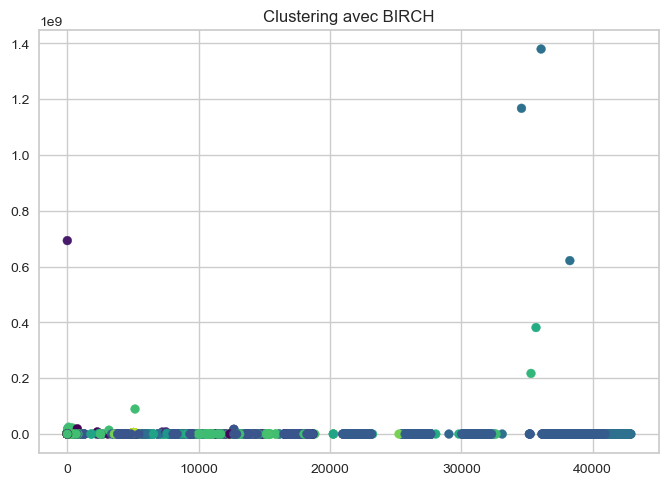

Shape globale 102689 Shape F 82672 Shape C 967
Nombre de clusters : 284
Clusters uniques : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 

In [50]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assume d_raw is your DataFrame
# d_norm is used in the Birch fitting process

# Appliquer l'algorithme BIRCH
birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_norm)

# Prédire les clusters pour d_raw
y_birch = birch.predict(d_norm)

# Ajouter les clusters prédits à d_raw
d_raw['class_pred_birch'] = pd.Series(y_birch)

# Convertir d_raw en un tableau NumPy (si nécessaire)
d_raw_np = d_raw.to_numpy()

# Visualiser les résultats du clustering
plt.scatter(d_raw_np[:, 0], d_raw_np[:, 1], c=y_birch, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH')
plt.show()

# Filtrer les données en fonction des clusters prédits
train_f_birch = d_raw[d_raw['class_pred_birch'] > 0]
train_c_birch = d_raw[d_raw['class_pred_birch'] <= 0]

# Afficher les informations sur la forme des clusters
print("Shape globale " + str(d_raw.shape[0]) + " Shape F " + str(train_f_birch.shape[0]) + 
      " Shape C " + str(train_c_birch.shape[0]))

# y_birch contient les étiquettes de cluster prédites par BIRCH
unique_clusters = np.unique(y_birch)
num_clusters = len(unique_clusters)

print("Nombre de clusters :", num_clusters)
print("Clusters uniques :", unique_clusters)


## d_norm

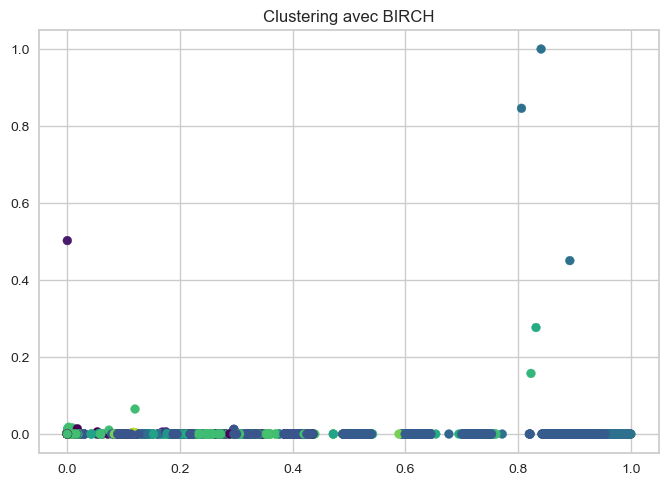

Shape globale 102689 Shape F 101484 Shape C 1205
Nombre de clusters : 284
Clusters uniques : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 22

In [55]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assume d_norm is your DataFrame

# Appliquer l'algorithme BIRCH
birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_norm)

# Prédire les clusters
y_birch = birch.predict(d_norm)

# Convertir d_norm en un tableau NumPy
d_norm_np = d_norm.to_numpy()

# Visualiser les résultats du clustering
plt.scatter(d_norm_np[:, 0], d_norm_np[:, 1], c=y_birch, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH')
plt.show()

# Ajouter les clusters prédits à d_raw
d_norm['class_pred_birch'] = pd.Series(y_birch)

# Filtrer les données en fonction des clusters prédits
train_f_birch = d_norm[d_norm['class_pred_birch'] > 0]
train_c_birch = d_norm[d_norm['class_pred_birch'] <= 0]

# Afficher les informations sur la forme des clusters
print("Shape globale " + str(d_norm.shape[0]) + " Shape F " + str(train_f_birch.shape[0]) + 
      " Shape C " + str(train_c_birch.shape[0]))

import numpy as np

# y_birch contient les étiquettes de cluster prédites par BIRCH
unique_clusters = np.unique(y_birch)
num_clusters = len(unique_clusters)

print("Nombre de clusters :", num_clusters)
print("Clusters uniques :", unique_clusters)



### d_norm_pca : 

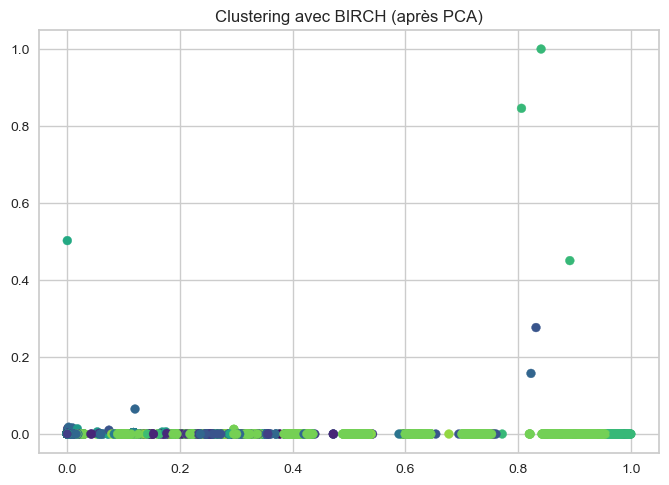

Shape globale 102689 Shape F 101870 Shape C 819
Nombre de clusters après PCA : 349
Clusters uniques après PCA : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218

In [56]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt


# Appliquer l'algorithme BIRCH à d_norm_pca
birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_norm_pca)

# Prédire les clusters pour d_norm_pca
y_birch_pca = birch.predict(d_norm_pca)

# Ajouter les clusters prédits à d_raw
d_norm_pca['class_pred_birch_pca'] = pd.Series(y_birch_pca)

# Visualiser les résultats du clustering pour d_norm_pca
plt.scatter(d_norm_pca.iloc[:, 0], d_norm_pca.iloc[:, 1], c=y_birch_pca, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH (après PCA)')
plt.show()

# Filtrer les données en fonction des clusters prédits
train_f_birch_pca = d_norm_pca[d_norm_pca['class_pred_birch_pca'] > 0]
train_c_birch_pca = d_norm_pca[d_norm_pca['class_pred_birch_pca'] <= 0]

# Afficher les informations sur la forme des clusters
print("Shape globale " + str(d_norm_pca.shape[0]) + " Shape F " + str(train_f_birch_pca.shape[0]) + 
      " Shape C " + str(train_c_birch_pca.shape[0]))

# y_birch_pca contient les étiquettes de cluster prédites par BIRCH après PCA
unique_clusters_pca = np.unique(y_birch_pca)
num_clusters_pca = len(unique_clusters_pca)

print("Nombre de clusters après PCA :", num_clusters_pca)
print("Clusters uniques après PCA :", unique_clusters_pca)


## d_raw_probs :

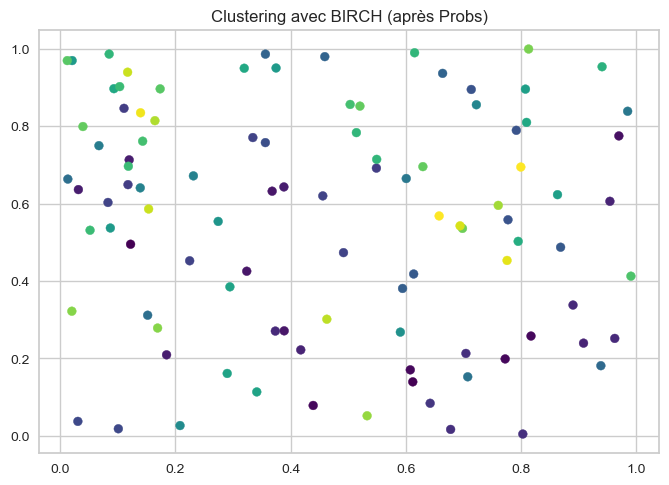

Shape globale 100 Shape F 98 Shape C 2
Nombre de clusters après PCA : 51
Clusters uniques après PCA : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [57]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

d_raw_probs = pd.DataFrame(d_raw_probs)


birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_raw_probs)

# Prédire les clusters pour d_raw_probs
y_birch_pca = birch.predict(d_raw_probs)

# Ajouter les clusters prédits à d_raw_probs
d_raw_probs['class_pred_raw_prob'] = pd.Series(y_birch_pca)

# Visualiser les résultats du clustering pour d_raw_probs
plt.scatter(d_raw_probs.iloc[:, 0], d_raw_probs.iloc[:, 1], c=y_birch_pca, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH (après Probs)')
plt.show()

# Filtrer les données en fonction des clusters prédits
train_f_birch_pca = d_raw_probs[d_raw_probs['class_pred_raw_prob'] > 0]
train_c_birch_pca = d_raw_probs[d_raw_probs['class_pred_raw_prob'] <= 0]

# Afficher les informations sur la forme des clusters
print("Shape globale " + str(d_raw_probs.shape[0]) + " Shape F " + str(train_f_birch_pca.shape[0]) + 
      " Shape C " + str(train_c_birch_pca.shape[0]))

# y_birch_pca contient les étiquettes de cluster prédites par BIRCH après PCA
unique_clusters_pca = np.unique(y_birch_pca)
num_clusters_pca = len(unique_clusters_pca)

print("Nombre de clusters après PCA :", num_clusters_pca)
print("Clusters uniques après PCA :", unique_clusters_pca)


## d_raw_pca_probs :

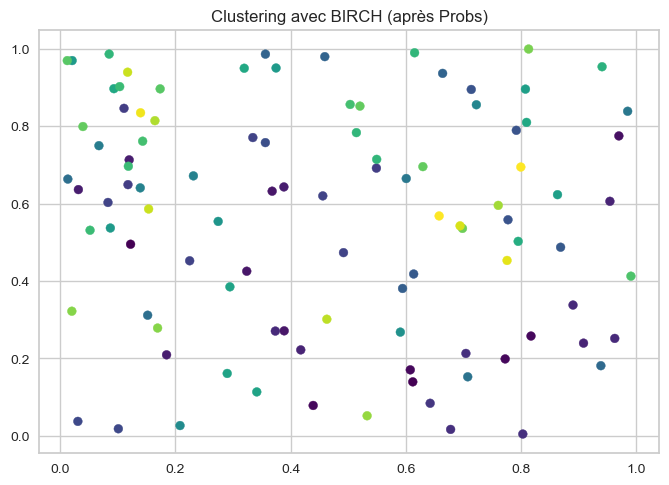

Shape globale 100 Shape F 98 Shape C 2
Nombre de clusters après PCA : 51
Clusters uniques après PCA : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [58]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

d_raw_pca_probs = pd.DataFrame(d_raw_pca_probs)

birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_raw_pca_probs)

# Prédire les clusters pour d_raw_pca_probs
y_birch_pca = birch.predict(d_raw_pca_probs)

# Ajouter les clusters prédits à d_raw_pca_probs
d_raw_pca_probs['class_pred_raw_prob'] = y_birch_pca


# Visualiser les résultats du clustering pour d_raw_pca_probs
plt.scatter(d_raw_pca_probs.iloc[:, 0], d_raw_pca_probs.iloc[:, 1], c=y_birch_pca, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH (après Probs)')
plt.show()

# Filtrer les données en fonction des clusters prédits
train_f_birch_pca = d_raw_pca_probs[d_raw_pca_probs['class_pred_raw_prob'] > 0]
train_c_birch_pca = d_raw_pca_probs[d_raw_pca_probs['class_pred_raw_prob'] <= 0]

# Afficher les informations sur la forme des clusters
print("Shape globale " + str(d_raw_pca_probs.shape[0]) + " Shape F " + str(train_f_birch_pca.shape[0]) + 
      " Shape C " + str(train_c_birch_pca.shape[0]))

# y_birch_pca contient les étiquettes de cluster prédites par BIRCH après PCA
unique_clusters_pca = np.unique(y_birch_pca)
num_clusters_pca = len(unique_clusters_pca)

print("Nombre de clusters après PCA :", num_clusters_pca)
print("Clusters uniques après PCA :", unique_clusters_pca)


## d_norm_probs:

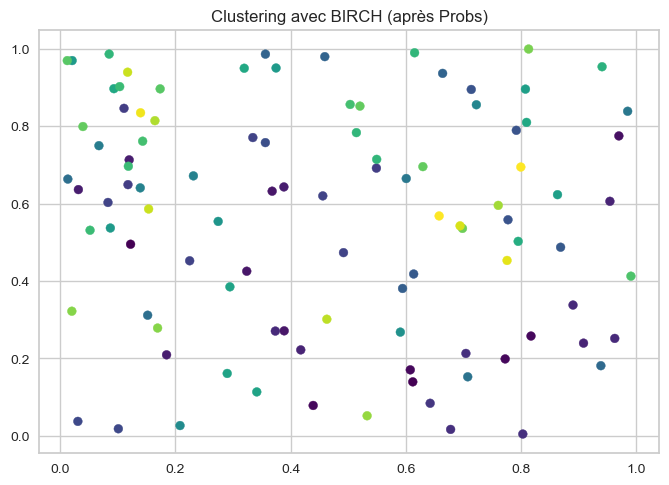

Shape globale 100 Shape F 98 Shape C 2
Nombre de clusters après PCA : 51
Clusters uniques après PCA : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [59]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

# Assuming d_norm_probs is your DataFrame
d_norm_probs = pd.DataFrame(d_norm_probs)

# Convert feature names to strings
d_norm_probs.columns = d_norm_probs.columns.astype(str)

birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_norm_probs)

# Prédire les clusters pour d_norm_probs
y_birch_pca = birch.predict(d_norm_probs)

# Ajouter les clusters prédits à d_norm_probs
d_norm_probs['class_pred_raw_prob'] = y_birch_pca

# Visualiser les résultats du clustering pour d_norm_probs
plt.scatter(d_norm_probs.iloc[:, 0], d_norm_probs.iloc[:, 1], c=y_birch_pca, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH (après Probs)')
plt.show()

# Filtrer les données en fonction des clusters prédits
train_f_birch_pca = d_norm_probs[d_norm_probs['class_pred_raw_prob'] > 0]
train_c_birch_pca = d_norm_probs[d_norm_probs['class_pred_raw_prob'] <= 0]

# Afficher les informations sur la forme des clusters
print("Shape globale " + str(d_norm_probs.shape[0]) + " Shape F " + str(train_f_birch_pca.shape[0]) + 
      " Shape C " + str(train_c_birch_pca.shape[0]))

# y_birch_pca contient les étiquettes de cluster prédites par BIRCH après PCA
unique_clusters_pca = np.unique(y_birch_pca)
num_clusters_pca = len(unique_clusters_pca)

print("Nombre de clusters après PCA :", num_clusters_pca)
print("Clusters uniques après PCA :", unique_clusters_pca)


## d_norm_pca_probs:

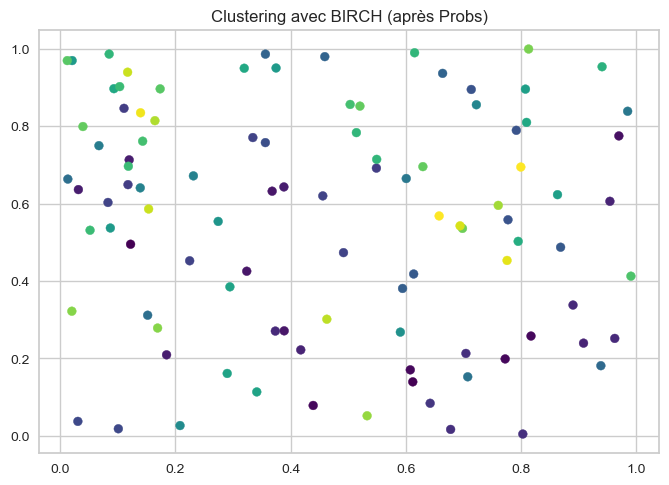

Shape globale 100 Shape F 98 Shape C 2
Nombre de clusters après PCA : 51
Clusters uniques après PCA : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [60]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

# Assuming d_norm_pca_probs is your DataFrame
d_norm_pca_probs = pd.DataFrame(d_norm_pca_probs)

# Convert feature names to strings
d_norm_pca_probs.columns = d_norm_pca_probs.columns.astype(str)

birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_norm_pca_probs)

# Prédire les clusters pour d_norm_pca_probs
y_birch_pca = birch.predict(d_norm_pca_probs)

# Ajouter les clusters prédits à d_norm_pca_probs
d_norm_pca_probs['class_pred_raw_prob'] = y_birch_pca

# Visualiser les résultats du clustering pour d_norm_pca_probs
plt.scatter(d_norm_pca_probs.iloc[:, 0], d_norm_pca_probs.iloc[:, 1], c=y_birch_pca, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH (après Probs)')
plt.show()

# Filtrer les données en fonction des clusters prédits
train_f_birch_pca = d_norm_pca_probs[d_norm_pca_probs['class_pred_raw_prob'] > 0]
train_c_birch_pca = d_norm_pca_probs[d_norm_pca_probs['class_pred_raw_prob'] <= 0]

# Afficher les informations sur la forme des clusters
print("Shape globale " + str(d_norm_pca_probs.shape[0]) + " Shape F " + str(train_f_birch_pca.shape[0]) + 
      " Shape C " + str(train_c_birch_pca.shape[0]))

# y_birch_pca contient les étiquettes de cluster prédites par BIRCH après PCA
unique_clusters_pca = np.unique(y_birch_pca)
num_clusters_pca = len(unique_clusters_pca)

print("Nombre de clusters après PCA :", num_clusters_pca)
print("Clusters uniques après PCA :", unique_clusters_pca)


## MLP 

MLP on d_raw

In [72]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
import numpy as np
#use of an autoencoder, a type of neural network, for dimensionality reduction.
X, _ = make_classification(n_samples=10000, n_features=24, n_classes=2, random_state=42)
# Create and train an autoencoder (MLPRegressor with the same number of input and output neurons)
autoencoder = MLPRegressor(hidden_layer_sizes=(24,), max_iter=10000, random_state=42)
autoencoder.fit(d_raw, d_raw)

# Use the predict method to obtain the encoded data
encoded_data = autoencoder.predict(d_raw)



ValueError: Input X contains NaN.
MLPRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [73]:
# Import necessary libraries
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_regressor.fit(d_raw, d_raw) 
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], label='Encoded Data')
plt.title('2D Representation of Encoded Data')
plt.legend()
plt.show()


ValueError: Input X contains NaN.
MLPRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

MLP on d_norm

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
import numpy as np
X, _ = make_classification(n_samples=10000, n_features=24, n_classes=2, random_state=42)
autoencoder = MLPRegressor(hidden_layer_sizes=(24,), max_iter=10000, random_state=42)
autoencoder.fit(d_norm, d_norm)
encoded_data1= autoencoder.predict(d_norm)


In [54]:
# Import necessary libraries
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_regressor.fit(d_norm, d_norm) 
plt.scatter(encoded_data1[:, 0], encoded_data1[:, 1], label='Encoded Data')
plt.title('2D Representation of Encoded Data')
plt.legend()
plt.show()

NameError: name 'encoded_data1' is not defined

MLP on d_norm_pca

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
import numpy as np
X, _ = make_classification(n_samples=10000, n_features=24, n_classes=2, random_state=42)
autoencoder = MLPRegressor(hidden_layer_sizes=(24,), max_iter=10000, random_state=42)
autoencoder.fit(d_norm_pca, d_norm_pca)
encoded_data2= autoencoder.predict(d_norm_pca)

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_regressor.fit(d_norm_pca,d_norm_pca) 
plt.scatter(encoded_data2[:, 0], encoded_data2[:, 1], label='Encoded Data')
plt.title('2D Representation of Encoded Data')
plt.legend()
plt.show()

## MLP on  d_raw_probs :

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
import numpy as np
X, _ = make_classification(n_samples=10000, n_features=24, n_classes=2, random_state=42)
autoencoder = MLPRegressor(hidden_layer_sizes=(24,), max_iter=10000, random_state=42)
autoencoder.fit(d_raw_probs,d_raw_probs)
encoded_data3= autoencoder.predict(d_raw_probs)